In [2]:
!pip install transformers datasets rouge-score -q

  Preparing metadata (setup.py) ... done


A tarefa de seq2seq (Sequence to Sequence) é um tipo de modelo de aprendizado profundo que envolve o mapeamento de uma sequência de entrada para uma sequência de saída. Essa técnica é usada em diversas aplicações de processamento de linguagem natural (PLN), como tradução automática, sumarização de textos e, no nosso caso, geração automática de docstrings para códigos de programação. A ideia central dessa tarefa é treinar um modelo para entender a sequência de entrada (neste caso, o código) e gerar uma sequência de saída (a docstring) que explique de maneira clara o que o código faz, quais são seus parâmetros e como ele deve ser utilizado.

No contexto de gerar uma docstring a partir de um código, o modelo seq2seq aprende a transformar o código-fonte (geralmente em uma linguagem como Python) em uma descrição estruturada, com informações sobre o propósito da função, seus parâmetros, valores de retorno e exemplos de uso. Essa aplicação é extremamente útil para automatizar a documentação de projetos de programação, o que facilita a manutenção e o entendimento do código por outros desenvolvedores.

### Exemplo de Entrada e Saída

**Entrada (código):**
```python
def add(a, b):
    """
    Soma dois números.
    :param a: Primeiro número a ser somado.
    :param b: Segundo número a ser somado.
    :return: A soma de a e b.
    """
    return a + b
```
**Saída (docstring):**

A função `add` recebe dois números como parâmetros e retorna a soma deles.

#### Parâmetros:
- `a` (int ou float): O primeiro número a ser somado.
- `b` (int ou float): O segundo número a ser somado.

#### Retorno:
- (int ou float): A soma dos dois números fornecidos.


Neste exemplo, o código de entrada é uma função simples em Python que soma dois números. A saída é uma docstring gerada automaticamente, explicando o que a função faz, os parâmetros que ela recebe e o valor que retorna. Além disso, um exemplo de uso é gerado para ilustrar como a função pode ser chamada na prática.

Este processo de gerar automaticamente docstrings pode ser extremamente útil, especialmente em projetos grandes e complexos, onde a documentação manual pode ser demorada e propensa a erros. Com um modelo seq2seq bem treinado, é possível criar docstrings de maneira rápida e consistente, melhorando a legibilidade e a manutenção do código.



### Dataset

#### michaelfeil/mined_docstrings_pypi_embedded

O dataset **`michaelfeil/mined_docstrings_pypi_embedded`** é um conjunto de dados projetado para facilitar a tarefa de gerar docstrings de código Python de maneira automática. Ele foi extraído e estruturado a partir de pacotes Python disponíveis no PyPI (Python Package Index). O objetivo desse dataset é servir como base para treinamento de modelos de aprendizado de máquina, principalmente modelos seq2seq, para gerar descrições e documentação automatizada de funções, classes e módulos de código.

Este dataset foi incorporado ao **`jina-code-v2`**, uma versão do modelo Jina, que é projetado para lidar com dados de código-fonte. O **`jina-code-v2`** inclui embeddings de código para representar trechos de código de maneira compacta e semântica, o que ajuda na tarefa de gerar ou entender docstrings, aprimorando modelos de inteligência artificial para documentação automática e entendimento de código. A combinação dos embeddings com a estrutura do dataset torna este conjunto de dados uma ferramenta poderosa para o desenvolvimento de modelos inteligentes de documentação de código Python.

In [1]:
from datasets import load_dataset

ds = load_dataset("michaelfeil/mined_docstrings_pypi_embedded")

README.md:   0%|          | 0.00/547 [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/293M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/290M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/280053 [00:00<?, ? examples/s]

In [ ]:
print(ds['train'][0])  # Exibe o primeiro exemplo no conjunto de treino

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['index', 'package', 'name', 'docstring', 'code', 'signature', 'embed_func_code'],
        num_rows: 280053
    })
})

### Tokenização
A **tokenização** é um processo fundamental em **NLP**, no qual um texto ou código é dividido em unidades menores, chamadas de tokens. Esses tokens podem ser palavras, subpalavras ou caracteres, dependendo da granularidade escolhida. A tokenização é crucial para que o modelo entenda o texto e possa processá-lo de forma eficaz. No caso de **tokenização de código**, o objetivo é dividir o código-fonte em tokens que representem variáveis, funções, operadores e outros componentes do código. Esse processo é especialmente importante em tarefas como análise de código e geração automática de documentação.

O **RobertaTokenizerFast** é uma versão otimizada do tokenizer RoBERTa, que usa um algoritmo mais rápido para tokenizar texto e código, melhorando a performance sem perder precisão. Ao usar o **RobertaTokenizerFast**, o modelo pode lidar eficientemente com grandes quantidades de texto ou código, facilitando tarefas como classificação, análise de sentimentos, ou até mesmo tarefas mais complexas de compreensão de código.

O código a seguir carrega o **RobertaTokenizerFast** para um modelo específico de código, o **"Salesforce/codet5-small"**, que é uma versão otimizada do T5 (Text-to-Text Transfer Transformer) para trabalhar com código. O modelo pode ser utilizado para tarefas como tradução de código, análise de código e geração de docstrings. 

In [4]:
from transformers import RobertaTokenizerFast
model_name = "Salesforce/codet5-small"

# Load tokenizer
tokenizer = RobertaTokenizerFast.from_pretrained(model_name)
tokenizer.is_fast

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

True

O seguinte código filtra o dataset `ds` para reter apenas os exemplos que contêm funções Python, ou seja, aqueles que começam com a palavra-chave `def`, usada para definir funções no código Python. Isso é feito removendo espaços em branco à esquerda de cada linha e verificando se ela começa com "def".

In [5]:
ds = ds.filter(lambda x: [code.lstrip().startswith("def") for code in x["code"]], batched=True)

Filter:   0%|          | 0/280053 [00:00<?, ? examples/s]

O seguinte código filtra o dataset `ds` para reter apenas os exemplos que contêm docstrings válidas. Ele verifica se o campo `docstring` não é `None` em cada exemplo, garantindo que apenas os exemplos com docstrings presentes sejam mantidos no dataset. Essa filtragem é útil para garantir que os exemplos com docstrings ausentes sejam descartados antes de uma análise ou treinamento.

In [6]:
ds = ds.filter(lambda x: [docstring != None for docstring in x["docstring"]], batched=True)

Filter:   0%|          | 0/217583 [00:00<?, ? examples/s]

O seguinte código filtra o dataset `ds` para reter apenas os exemplos cujas docstrings possuem 5 ou mais palavras. Ele verifica o comprimento de cada docstring, contando o número de palavras (separadas por espaços), e mantém apenas os exemplos onde a docstring contém pelo menos 5 palavras. Essa filtragem é útil para eliminar docstrings muito curtas, que podem ser insuficientes para tarefas como geração de descrições ou análise detalhada.

In [7]:
ds = ds.filter(lambda x: [len(docstring.split(" ")) >= 5 for docstring in x["docstring"]], batched=True)

Filter:   0%|          | 0/123665 [00:00<?, ? examples/s]

In [8]:
ds

DatasetDict({
    train: Dataset({
        features: ['index', 'package', 'name', 'docstring', 'code', 'signature', 'embed_func_code'],
        num_rows: 118165
    })
})

Após a etapa de pré-processamento, que incluiu a filtragem do dataset com base em condições específicas para funções e docstrings, o dataset resultante possui um total de 118.165 instâncias. Esse conjunto de dados agora está preparado para análises ou treinamento de modelos, com exemplos mais relevantes, contendo funções Python e docstrings adequadas, garantindo a qualidade e a relevância dos dados para as tarefas subsequentes.

### Processo de Pré-processamento

O processo de pré-processamento é uma etapa essencial para preparar o dataset antes de alimentá-lo em um modelo de aprendizado de máquina. No código abaixo, o objetivo é transformar o código fonte e suas respectivas docstrings em um formato que o modelo possa entender. Aqui está o que acontece em cada passo:

1. **Função de Pré-processamento (`preprocess_function`)**: Esta função recebe um exemplo do dataset, que contém o código fonte (`"code"`) e a docstring correspondente (`"docstring"`). A função então:
   - **Tokeniza o código e a docstring**: Utilizando um *tokenizer* (ferramenta que divide o texto em unidades menores, chamadas tokens), o código e a docstring são transformados em uma sequência de números que representam as palavras ou sub-palavras.
   - **Adiciona as labels**: As docstrings tokenizadas são usadas como "rótulos" (labels) para o modelo, ou seja, são as respostas esperadas para a entrada de código.
   
2. **Aplicação do Pré-processamento**: A função de pré-processamento é aplicada ao dataset inteiro com o método `map`. Isso faz com que todos os exemplos do dataset passem pela função e sejam transformados para o formato adequado ao modelo.

Ao final, o dataset tokenizado estará pronto para ser utilizado no treinamento do modelo, com os códigos e docstrings representados de forma que o modelo possa entender e aprender.

In [9]:
# Preprocess function
def preprocess_function(examples):
    inputs = examples["code"]
    targets = examples['docstring']
    model_inputs = tokenizer(inputs, truncation=True)
    labels = tokenizer(targets, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply preprocessing
tokenized_datasets = ds.map(preprocess_function, batched=True)

Map:   0%|          | 0/118165 [00:00<?, ? examples/s]

### Divisão do Dataset em Conjuntos de Treinamento, Validação e Teste

Após o pré-processamento do dataset, o próximo passo é dividir o dataset em três conjuntos principais: treinamento, validação e teste. Esses conjuntos são usados para treinar, ajustar e avaliar o modelo. Aqui está como isso é feito:

1. **Divisão em Conjunto de Treinamento e Teste**: 
   A partir do dataset tokenizado, a função `train_test_split` é usada para dividir os dados em dois subconjuntos: 
   - **Treinamento**: O conjunto utilizado para treinar o modelo.
   - **Teste**: O conjunto utilizado para testar o desempenho final do modelo, uma vez que ele tenha sido treinado.
   A divisão é feita com 90% dos dados para treinamento e 10% para teste (`test_size=0.1`).

2. **Criação do Conjunto de Validação**: 
   O conjunto de treinamento é novamente dividido para criar um subconjunto de **validação**. Esse conjunto é utilizado para ajustar os parâmetros do modelo durante o treinamento. A divisão é feita com 10% dos dados de treinamento, resultando em 80% para treinamento e 10% para validação.

3. **Extração dos Conjuntos**: Após a divisão, os conjuntos de treinamento, validação e teste são extraídos e estão prontos para serem utilizados no treinamento do modelo.

Ao final, temos três conjuntos:
- **train_dataset**: Usado para treinar o modelo.
- **val_dataset**: Usado para ajustar hiperparâmetros e validar o desempenho durante o treinamento.
- **test_dataset**: Usado para testar a performance do modelo após o treinamento.

Esses passos garantem que o modelo seja treinado de maneira eficaz e avaliado corretamente em dados não vistos.


In [10]:
from datasets import load_dataset, DatasetDict

# Assuming tokenized_datasets is already loaded and preprocessed
train_test_split = tokenized_datasets["train"].train_test_split(test_size=0.1)

# Extract train and test datasets
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]

# Split the train dataset further to create a validation dataset (e.g., 10% of the train data)
train_val_split = train_dataset.train_test_split(test_size=0.1)  # 10% of the train set for validation

# Extract the new train and validation datasets
train_dataset = train_val_split["train"]
val_dataset = train_val_split["test"]

In [11]:
train_dataset.num_rows, val_dataset.num_rows, test_dataset.num_rows

(95713, 10635, 11817)

### Modelo CodeT5 e o Processo de Fine-Tuning

O **CodeT5** é um modelo pré-treinado baseado na arquitetura Transformer, projetado para lidar com tarefas de **entendimento e geração de código**. Ele adota uma estrutura unificada que permite realizar múltiplas tarefas ao mesmo tempo, como compreensão e geração de código, e oferece suporte para aprendizado multitarefa. A principal inovação do CodeT5 está em sua capacidade de entender e gerar código de maneira eficiente, aproveitando semânticas provenientes dos identificadores nomeados pelos desenvolvedores no código.

**Tarefas de Pré-Treinamento**: O modelo é pré-treinado com uma tarefa inédita que visa melhorar a identificação dos *identificadores* no código. Os identificadores são partes do código como variáveis, funções ou classes que carregam semânticas importantes. O CodeT5 consegue distinguir entre tokens de código que são identificadores e outros tokens, e pode até mesmo recuperar esses identificadores quando eles estão mascarados, o que é uma tarefa comum em modelos de linguagem baseados em transformers.

Além disso, o modelo também utiliza uma abordagem de **comentários escritos pelos usuários** para reforçar o alinhamento entre código e linguagem natural. Através de uma tarefa de **geração bimodal dual**, o CodeT5 melhora a correspondência entre código e explicações em linguagem natural, o que o torna especialmente útil para tarefas como resumo de código e tradução de código para descrições mais legíveis.

**Uso Principal e Aplicações**: O CodeT5 é ideal para o **fine-tuning** em uma série de tarefas relacionadas ao código, incluindo:
- **Sumarização de código**: Gerar resumos concisos para trechos de código.
- **Geração de código**: Criar novos trechos de código com base em descrições ou outros fragmentos de código.
- **Tradução de código**: Converter código de uma linguagem de programação para outra.
- **Refinamento de código**: Melhorar e otimizar o código existente.
- **Detecção de defeitos em código**: Identificar possíveis erros ou vulnerabilidades no código.
- **Detecção de clones de código**: Identificar trechos de código semelhantes ou duplicados em grandes bases de código.

**Limitações**: Embora o modelo seja poderoso, ele foi treinado principalmente para tarefas de entendimento e geração de código. Portanto, suas capacidades podem ser mais limitadas para tarefas fora desse escopo, como análises muito específicas de código, que exigem contextos altamente especializados.

**Fine-Tuning**: O **fine-tuning** deste modelo pode ser realizado para uma tarefa específica de interesse, ajustando os parâmetros do modelo pré-treinado com um conjunto de dados específico da tarefa, como sumarização de código, geração ou detecção de defeitos. O CodeT5 será capaz de adaptar suas habilidades para essas tarefas específicas, aproveitando o pré-treinamento e ajustando-se ao novo domínio ou tipo de código que está sendo abordado.

In [12]:
from transformers import T5ForConditionalGeneration
import torch

# Load the model
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Check if GPU is available, otherwise fall back to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device
# model = model.to(device)
print(f"Model moved to device: {device}")

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

Model moved to device: cuda


In [13]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./t5_finetuned",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=1,
    weight_decay=0.01,

    num_train_epochs=2,
    logging_dir="./logs",
    logging_steps=50,
    
    eval_strategy="no",
    
    save_strategy="steps",  # Save model at specific intervals
    save_steps=1000,  # Save checkpoint every 1000 steps

    fp16=True,  # Use mixed precision for faster training if on GPU
    remove_unused_columns = True,
    gradient_checkpointing=True,
)

### Processo de Avaliação da Tarefa

O código abaixo implementa a **avaliação de desempenho** de um modelo de **geração de código ou texto** utilizando métricas amplamente usadas em processamento de linguagem natural: **ROUGE**. Essas métricas comparam as **previsões geradas** pelo modelo com as **labels reais** (ou referências) para avaliar a qualidade do texto gerado.

1. **ROUGE**: A métrica ROUGE é usada para medir a sobreposição de n-grams (sequências de n palavras) entre a previsão gerada e a referência. O código utiliza o **`rouge_scorer`** da biblioteca `rouge_score` para calcular as pontuações de ROUGE nas variantes:
   - **ROUGE-1**: Mede a sobreposição de unigramas (palavras individuais).
   - **ROUGE-2**: Mede a sobreposição de bigramas (sequências de duas palavras).
   - **ROUGE-L**: Mede a maior sequência comum de palavras (longest common subsequence).
   - **ROUGE-Lsum**: Calcula a ROUGE-L para o resumo completo.

In [26]:
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import numpy as np

# Define compute_metrics function
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    
    max_token_id = tokenizer.vocab_size - 1
    labels = np.clip(labels, 0, max_token_id)  # Clipping para garantir que os valores fiquem dentro do limite

    # Decode predictions and labels to text
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Initialize metrics
    rouge_scorer_instance = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': [], 'rougeLsum': []}
    gen_lengths = []

    for pred, label in zip(decoded_preds, decoded_labels):
        # ROUGE scores
        scores = rouge_scorer_instance.score(label, pred)
        for key in rouge_scores:
            rouge_scores[key].append(scores[key].fmeasure)

        # Track generated length
        gen_lengths.append(len(pred.split()))

    # Average ROUGE scores
    results = {
        'rouge1': np.mean(rouge_scores['rouge1']),
        'rouge2': np.mean(rouge_scores['rouge2']),
        'rougeL': np.mean(rouge_scores['rougeL']),
        'rougeLsum': np.mean(rouge_scores['rougeLsum']),
        'gen_len': np.mean(gen_lengths),  # Average generated length
    }

    return results

O uso de `DataCollatorForSeq2Seq` é fundamental mesmo após a tokenização sem padding, pois ele garante que as sequências de diferentes comprimentos dentro de um batch sejam ajustadas com padding adequado para que todas tenham o mesmo tamanho. Isso permite que o modelo seja treinado de forma eficiente, com a criação de máscaras de atenção para ignorar o padding e otimizar o uso da memória. Além disso, o collator facilita o processo de treinamento em batches, mantendo o desempenho e a compatibilidade com o modelo, como o CodeT5, em tarefas de seq2seq.

In [15]:
from transformers import DataCollatorForSeq2Seq,DataCollator

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

## Treinamento

In [16]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    processing_class=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,  # Add this line
)

**IMPORTANTE:** Ao executar essa célula abaixo, é preciso setar o secret do kaggle **wandb_api** como uma chave de api de sua própria conta

mais detalhes:  https://www.kaggle.com/code/ayuraj/experiment-tracking-with-weights-and-biases#%F0%9F%94%B5-1b.-Import-wandb-and-log-in

In [33]:
from kaggle_secrets import UserSecretsClient
import wandb

user_secrets = UserSecretsClient()

# I have saved my API token with "wandb_api" as Label. 
# If you use some other Label make sure to change the same below. 
wandb_api = user_secrets.get_secret("wandb_api") 

wandb.login(key=wandb_api)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: igor-joaquim (igor-joaquim-universidade-federal-de-minas-gerais). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [18]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Tracking run with wandb version 0.19.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250131_101154-7yel87a7
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run ./t5_finetuned
wandb: ⭐️ View project at https://wandb.ai/igor-joaquim-universidade-federal-de-minas-gerais/huggingface
wandb: 🚀 View run at https://wandb.ai/igor-joaquim-universidade-federal-de-minas-gerais/huggingface/runs/7yel87a7
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss
50,3.551700
100,1.619300
150,1.267700
200,1.103700
250,0.816400
300,0.912600
350,0.789500
400,0.804100
450,0.718700
500,0.792600


TrainOutput(global_step=11966, training_loss=0.5088291464691953, metrics={'train_runtime': 10985.6506, 'train_samples_per_second': 17.425, 'train_steps_per_second': 1.089, 'total_flos': 2.568826064800973e+16, 'train_loss': 0.5088291464691953, 'epoch': 2.0})

![](https://raw.githubusercontent.com/IgorJoaquimn/datas/refs/heads/main/W%26B%20Chart%201_31_2025%2C%207_46_36%20PM.png)

Como podemos ver do gráfico acima, o processo de treinamento chega em um platô após cerca de 3k batchs de treinamento, sendo grande parte do treinamento com pouco ganho em relação a Loss.

Entretanto, é preciso ver a perfomance do modelo nas métricas adequadas na tarefa para avaliar o seu desempenho.

## Avaliação

In [17]:
import os

os.environ['KAGGLE_USERNAME'] = 'igorrjoaquimn'
os.environ['KAGGLE_KEY'] = 'XXXXX' # Set a sua propia key https://www.kaggle.com/docs/api#authentication

A seguir, carregamos os dados gerados na etapa de treinamento

In [5]:
# !kaggle kernels output igorrjoaquimn/projeto-final -p /kaggle/working/run 

In [18]:
# Diretório base dos checkpoints
base_dir = "/kaggle/working/run/t5_finetuned"

# Lista de checkpoints ordenados numericamente
checkpoints = sorted([os.path.join(base_dir, d) for d in os.listdir(base_dir) if d.startswith("checkpoint-")], 
                     key=lambda x: int(x.split("-")[-1]))
checkpoints

['/kaggle/working/run/t5_finetuned/checkpoint-1000',
 '/kaggle/working/run/t5_finetuned/checkpoint-2000',
 '/kaggle/working/run/t5_finetuned/checkpoint-3000',
 '/kaggle/working/run/t5_finetuned/checkpoint-4000',
 '/kaggle/working/run/t5_finetuned/checkpoint-5000',
 '/kaggle/working/run/t5_finetuned/checkpoint-6000',
 '/kaggle/working/run/t5_finetuned/checkpoint-7000',
 '/kaggle/working/run/t5_finetuned/checkpoint-8000',
 '/kaggle/working/run/t5_finetuned/checkpoint-9000',
 '/kaggle/working/run/t5_finetuned/checkpoint-10000',
 '/kaggle/working/run/t5_finetuned/checkpoint-11000',
 '/kaggle/working/run/t5_finetuned/checkpoint-11966']

A fim de avaliar qual o melhor modelo, vamos executar a função `compute_metrics()` no conjunto de teste para cada modelo. Aquele que se sair melhor, vai ser o escolhido.

In [24]:
from torch.utils.data import DataLoader

columns_to_keep = ["input_ids", "attention_mask", "labels"]
test_dataset.set_format(type="torch", columns=columns_to_keep)

data_collator = DataCollatorForSeq2Seq(tokenizer, model=None, padding=True)

test_dataloader = DataLoader(
    test_dataset, batch_size=256, collate_fn=data_collator
)

In [31]:
import torch
from tqdm import tqdm
from transformers import T5ForConditionalGeneration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Ativar otimizações na GPU
torch.backends.cudnn.benchmark = True  # Otimiza convoluções na GPU

# ✅ Criar dicionário para armazenar métricas
metrics_results = {"checkpoint": [], "rouge1": [], "rouge2": [], "rougeL": [], "rougeLsum": [], "gen_len": []}

# ✅ Avaliação de cada checkpoint com barra de progresso
for checkpoint in checkpoints:
    print(f"\n🔍 Avaliando {checkpoint}...")

    # ✅ Carregar modelo e converter para FP16
    model = T5ForConditionalGeneration.from_pretrained(checkpoint).to(device).half()
    model.eval()

    predictions = []
    labels = []

    # ✅ Criar barra de progresso
    with torch.no_grad(), torch.autocast(device_type="cuda", dtype=torch.float16):
        for batch in tqdm(test_dataloader, desc=f"Inferência {checkpoint}", leave=False):
            input_ids = batch["input_ids"].to(device)
            batch_labels = batch["labels"].to(device)

            # ✅ Geração otimizada com barra de progresso
            output = model.generate(input_ids, max_length=128)

            # ✅ Adiar conversão para CPU para reduzir transferências
            predictions.append(output)
            labels.append(batch_labels)

    # ✅ Converter tensores de uma vez só para CPU/Numpy
    predictions = torch.cat(predictions).cpu().numpy()
    labels = torch.cat(labels).cpu().numpy()

    # ✅ Calcular métricas
    results = compute_metrics((predictions, labels))

    # ✅ Armazenar métricas
    metrics_results["checkpoint"].append(int(checkpoint.split("-")[-1]))
    for key in results:
        metrics_results[key].append(results[key])

print("\n✅ Avaliação concluída com otimizações e barra de progresso!")


🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-1000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-2000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-3000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-4000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-5000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-6000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-7000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-8000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-9000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-10000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-11000...



🔍 Avaliando /kaggle/working/run/t5_finetuned/checkpoint-11966...



✅ Avaliação concluída com otimizações e barra de progresso!


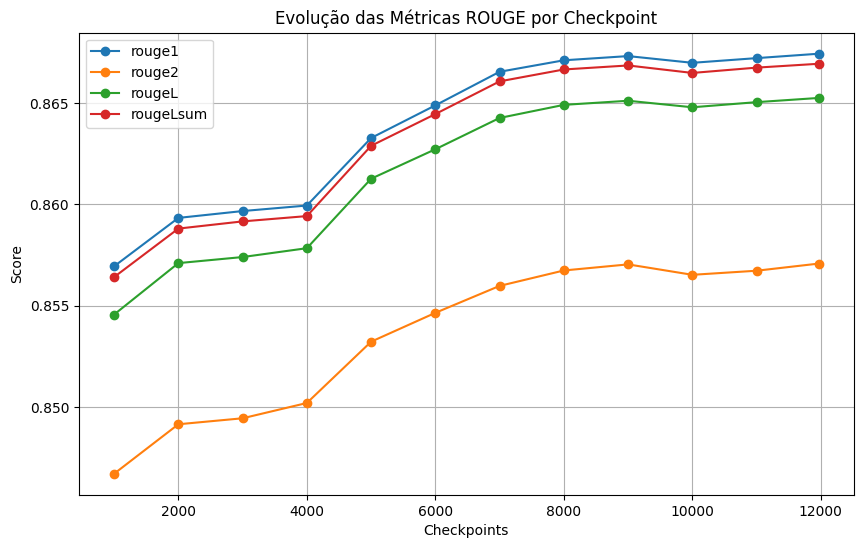

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for metric in ["rouge1", "rouge2", "rougeL", "rougeLsum"]:
    plt.plot(metrics_results["checkpoint"], metrics_results[metric], marker="o", label=metric)

plt.xlabel("Checkpoints")
plt.ylabel("Score")
plt.title("Evolução das Métricas ROUGE por Checkpoint")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Find the index of the best checkpoint based on 'rougeLsum'
best_checkpoint_idx = np.argmax(metrics_results['rougeLsum'])

# Get the best checkpoint
best_checkpoint = metrics_results['checkpoint'][best_checkpoint_idx]

# Print the best checkpoint and its corresponding rougeLsum score
print(f"The best checkpoint is: {best_checkpoint}")
print(f"With a rougeLsum score of: {metrics_results['rougeLsum'][best_checkpoint_idx]}")

The best checkpoint is: 11966
With a rougeLsum score of: 0.8669383733612744


In [39]:
checkpoint = "/kaggle/working/run/t5_finetuned/checkpoint-11966"

model = T5ForConditionalGeneration.from_pretrained(checkpoint).to(device)
model.eval()

s = "def iter(self, tag=None): Create and return tree iterator for the root element. The iterator loops over all elements in this tree, in document order. *tag* is a string with the tag name to iterate over (default is to return all elements).  # assert self._root is not None return self._root.iter(tag)"

In [41]:
input_ids = tokenizer(s, return_tensors="pt").input_ids.to(device)

# simply generate a single sequence
generated_ids = model.generate(input_ids, max_length=10)
print(tokenizer.decode(generated_ids[0], skip_special_tokens=True))
# this prints "user: {user.name}"

py:class:`~tree.
